## Import Libraries

In [38]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Load Data Sets

In [6]:
train_path= "./Data set/train.csv"
test_path= "./Data set/test.csv"

train_df= pd.read_csv(train_path)
test_df= pd.read_csv(test_path)

print("Shape of training: ", train_df.shape)
print("shape of test: ", test_df.shape)

Shape of training:  (42000, 785)
shape of test:  (28000, 784)


#### Preview Data Sets

Acccording to the Competition data description on [Digit Recognizier](https://www.kaggle.com/competitions/digit-recognizer/data)

The training data set, (train.csv), has 785 columns that contain the pixel-values of the associated image. Except for the first column, called "label", is the digit that was drawn by the user. The total number of observatiion is 42,000, meaning there are also same number of digit drawn by the user.

In [7]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Checking for issues in the Data set
The pixel-value is an integer between 0 and 255, inclusive, for each pixel (28 x 28 matrix) in the image, so each observation in a 783 column  is between 0 and 255. 

In [9]:
# Cheching for Empty or null or NaN values
# print(df.columns.isnull())
print("Number of empty observations", train_df.isnull().any().sum())

Number of empty observations 0


In [10]:
# Checking for Wrong data types
print("Data Types for each columns : ", (train_df.dtypes != "int64").sum())

Data Types for each columns :  0


In [11]:
train_img= train_df.label.sort_values()
print(f"Unique Images : {train_img.unique()},\nNumber of training set: {len(train_img)}")

Unique Images : [0 1 2 3 4 5 6 7 8 9],
Number of training set: 42000


In [12]:
print(f"Number of Test set: {len(test_df)}")

Number of Test set: 28000


## EDA

In [13]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Distribution of Pixels')

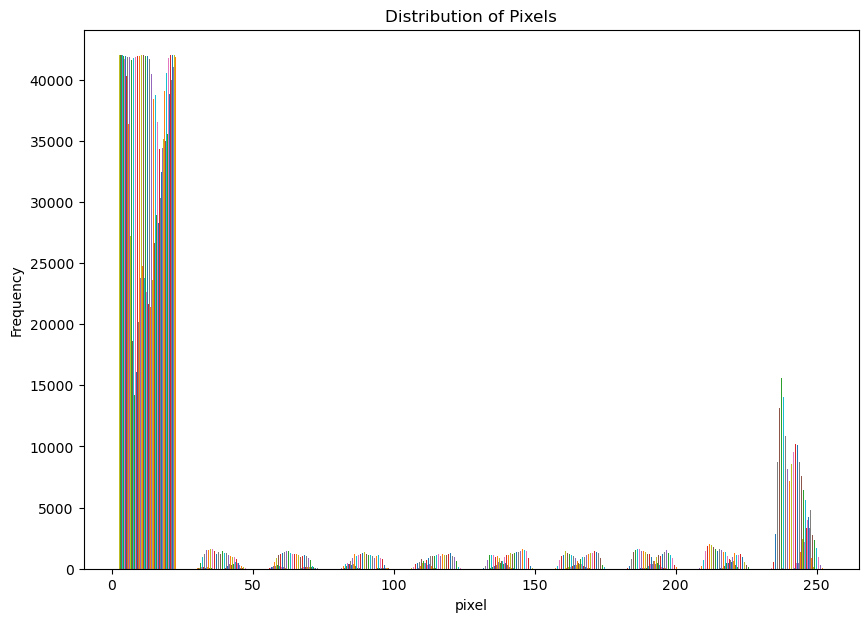

In [14]:
# Distribution of Pixels
# Each pixel has a single pixel-value associated with it, 
# indicating the lightness or darkness of that pixel, with higher numbers meaning darker. 
# This pixel-value is an integer between 0 and 255, inclusive.

pixels= train_df.loc[:, "pixel0":]

fig, ax= plt.subplots(1,1, figsize= (10, 7))

ax.hist(pixels)

plt.xlabel("pixel")
plt.ylabel("Frequency")
plt.title('Distribution of Pixels')

Text(0.5, 1.0, 'Distribution of Images')

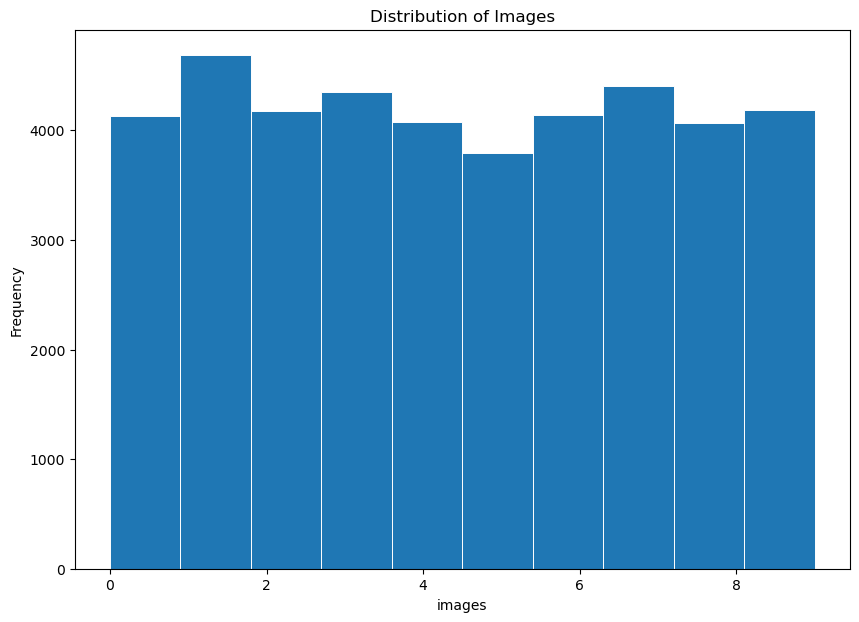

In [15]:
# Distribution of Label/Images 
# The Drawn image is between the 0 to 9

drawn_img= train_df.label.sort_values()

fig, ax= plt.subplots(1,1, figsize= (10, 7))

ax.hist(drawn_img, linewidth=0.7, edgecolor="white")


plt.xlabel("images")
plt.ylabel("Frequency")
plt.title('Distribution of Images')

#### Splitting Data set

It important to split the data set into features and label, that is, X and y variables. converting the variables numpy we also be done at this point, there many reasons for this but in this case, speed, reduce memory consumption.

In [16]:
# Split Features from label
features = train_df.iloc[:, 1::1].to_numpy()
labels = train_df.label.to_numpy()

# test data to numpy
test = test_df.to_numpy()

print("Shape of features: ",features.shape)
print("features Type: ", type(features))
print("Shape of labels: ",labels.shape)
print("features Type: ", type(labels), "\n")

print(f"test :  {test.shape} \nType : {type(test)} \n")

print("features values : \n", features[0:5, :], "\n")

print("labels values : ", labels[0:5])


Shape of features:  (42000, 784)
features Type:  <class 'numpy.ndarray'>
Shape of labels:  (42000,)
features Type:  <class 'numpy.ndarray'> 

test :  (28000, 784) 
Type : <class 'numpy.ndarray'> 

features values : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

labels values :  [1 0 1 4 0]


#### Visualize some drawn images 
By the Kaggle Data description, to get a shape on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. 
Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).
Thanks to [SAI PAVAN KUMAR YEDDUR](https://www.kaggle.com/code/saipavankumaryedduri/digitrecognizer-using-knn-0-977-dataaugmentation?kernelSessionId=134415847&scriptVersionId=134415847&cellId=26) for the loop part.

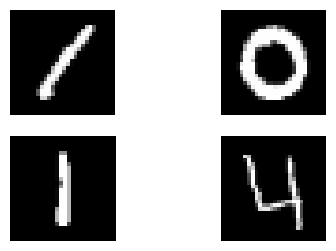

In [17]:
fig,ax= plt.subplots(2,2,figsize=(5,3))

# loop over the Train data set
for img, axis in zip(range(len(features)), ax.flatten()):
    
    # Reshape the flattened image data into its original shape
    image= features[img, : ].reshape(28,28)
    
    # Visualize the image using imshow
    axis.imshow(image, cmap='gray')
    axis.axis("off")  

## Split Features and label data into train and test data

The data did not undergo any form of modification before split, there were no new features generated for the features data.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=20)

## Model Training
using Support vector machines (SVMs), Support Vectors Classification (SVC).

In [19]:
# using default non-linear kernel
model= SVC()
model.fit(X_train, y_train)

SVC()

In [20]:
# liner Kernel 
linear_model= SVC(kernel="linear")
linear_model.fit(X_train, y_train)

SVC(kernel='linear')

## Model Prediction

In [21]:
train_pred= model.predict(X_test)

train_pred

array([2, 6, 4, ..., 4, 8, 6], dtype=int64)

In [22]:
train_linear_pred= linear_model.predict(X_test)

train_linear_pred

array([2, 6, 4, ..., 4, 3, 6], dtype=int64)

## Model Evaluation

Text(0.5, 1.0, 'SVC-Non Linear')

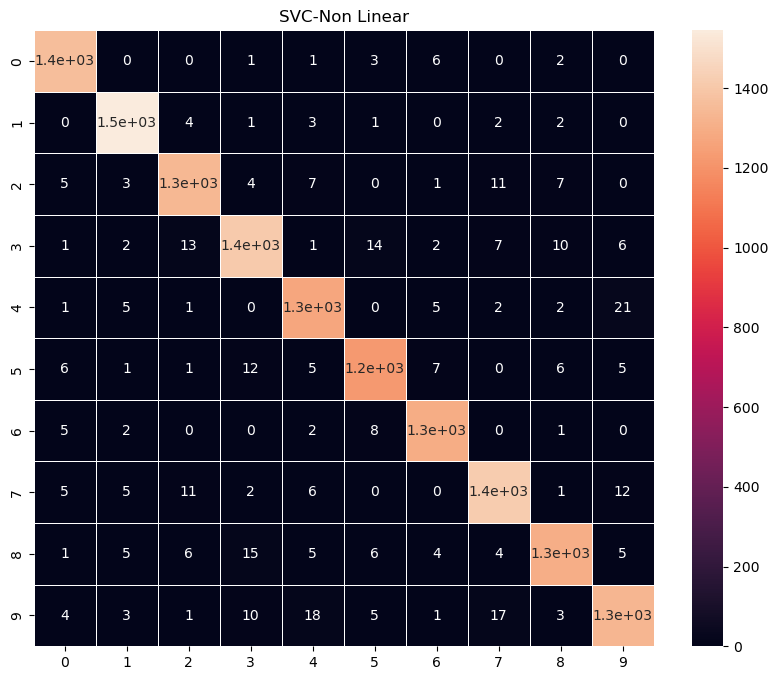

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, train_pred), annot=True, linewidths=0.5, ax=ax,)
plt.title("SVC-Non Linear")

Text(0.5, 1.0, 'SVC-Linear Kernal')

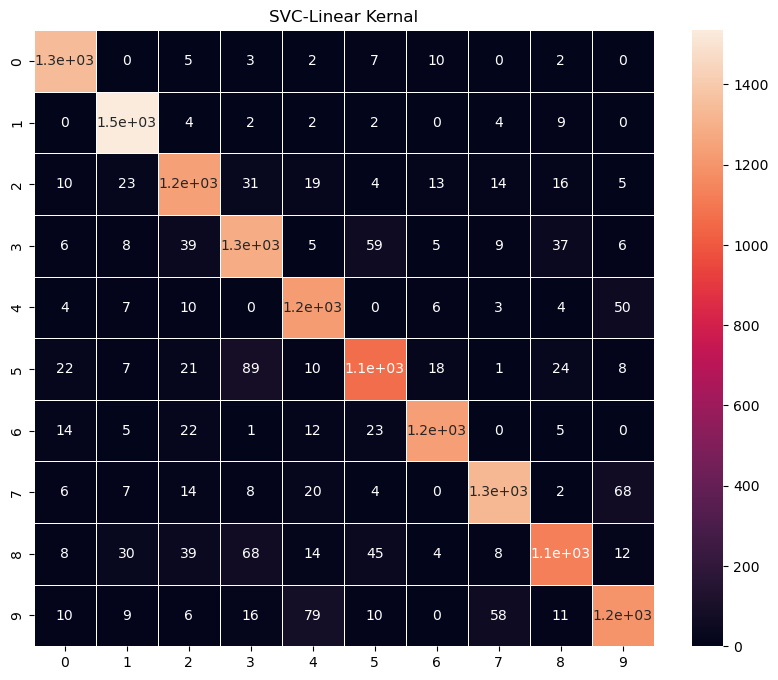

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, train_linear_pred), annot=True, linewidths=0.5, ax=ax,)
plt.title("SVC-Linear Kernal")

In [26]:
# Accuracy Score
print(f"Accuracy score Default parameters :  {accuracy_score(y_test, train_pred)} \n")

print(f"Accuracy score Linear kernel:  {accuracy_score(y_test, train_linear_pred)}")

Accuracy score Default parameters :  0.9730880230880231 

Accuracy score Linear kernel:  0.9074314574314575


## Normalize Training and Test Data Sets
For one the pixel-value is an integer between 0 and 255, and  to see if the models will perform better.

In [28]:
# Normalize the Features data 

Nor_X= features/255
Nor_test= test/255

print(f"Shape of Normalized Train features data : {Nor_X.shape} \nShpae of Normalized Test data : {Nor_test.shape}")

print(Nor_X[0:5, :], "\n")

print(Nor_test[0:5, :], "\n")

Shape of Normalized Train features data : (42000, 784) 
Shpae of Normalized Test data : (28000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 



In [29]:
# Splitting the Normalized data 
Nor_X_train, Nor_X_test, y_train, y_test = train_test_split(Nor_X, labels, test_size=0.33, random_state=20)

In [36]:
print("Train split: ", Nor_X_train.shape)
print("Test split", Nor_X_test.shape)

Train split:  (28140, 784)
Test split (13860, 784)


In [30]:
# Trainig models on Normalized Data

N_model= SVC()
N_model.fit(Nor_X_train, y_train)

SVC()

In [31]:
N_Linear_model= SVC(kernel="linear")
N_Linear_model.fit(Nor_X_train, y_train)

SVC(kernel='linear')

## Model Prediction

In [32]:
N_train_pred= N_model.predict(Nor_X_test)

print("Normalized train data non linear model predictions: ", N_train_pred, "\n")

N_L_train_pred= N_Linear_model.predict(Nor_X_test)

print("Normalized train data linear model predictions: ",N_L_train_pred, "\n")


print(f"Accuracy score non linear :  {accuracy_score(y_test, N_train_pred)} \n")

print(f"Accuracy score linear:  {accuracy_score(y_test, N_L_train_pred)}")

Normalized train data non linear model predictions:  [2 6 4 ... 4 8 6] 

Normalized train data linear model predictions:  [2 6 4 ... 4 8 6] 

Accuracy score non linear :  0.9730880230880231 

Accuracy score linear:  0.9288600288600288


There was little improvement for the linear model and no improvement for the non linear model.

Non Linear SVM Model accuracy: 97%

Linear SVM Model accuracy: ~ 93%

In [33]:
predictions= N_model.predict(Nor_test)

predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [34]:
submission_svm=pd.DataFrame({"Id": list(range(1,len(predictions)+1)),
                         "Label": predictions})

submission_svm.to_csv("submission.csv", index=False, header=True)

submission_svm.head()

,Id,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
